In [1]:
from webbrowser import get
import torchtt as tntt
import numpy as np
import tt_iga
import matplotlib.pyplot as plt
import torch as tn
import datetime

tn.set_default_dtype(tn.float64)


In [2]:
def create_geometry( ):
        
    Nt = 24                                                                
    lz = 40e-3                                                             
    Do = 72e-3                                                            
    Di = 51e-3                                                            
    hi = 13e-3                                                             
    bli = 3e-3                                                             
    Dc = 3.27640e-2                                                           
    # Dc = 32e-3
    # hc = 7e-3
    hc = 7.55176e-3                                                           
    ri = 20e-3                                                           
    ra = 18e-3                                                           
    blc = hi-hc                                                           
    rm = (Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri)                 
    R = rm-ri

    get_rO = lambda Ax,Ay,ri: (Ax**2+Ay**2-ri**2)/(np.sqrt(2)*(Ax+Ay)-2*ri)

    O = np.array([rm/np.sqrt(2),rm/np.sqrt(2)])
    alpha1 = -np.pi*3/4       
    alpha2 = np.math.asin((hc-rm/np.sqrt(2))/R)
    alpha = np.abs(alpha2-alpha1)
    
    A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
    b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
    C = np.linalg.solve(A,b)

    def Cx(ri,Dc,hc):
        O = [((Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri) )/np.sqrt(2),((Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri) )/np.sqrt(2)]
        A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
        b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
        C = np.linalg.solve(A,b)
        return C[0]

    def Cy(ri,Dc,hc):
        O = [((Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri) )/np.sqrt(2),( (Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri)  )/np.sqrt(2)]
        A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
        b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
        C = np.linalg.solve(A,b)
        return C[1]

    control_points = tt_iga.geometry.ParameterDependentControlPoints([7,5])

    # params ri - 0 , Dc - 1 , Di - 2 
    control_points[:,0,0] = [0,0]
    control_points[:,1,0] = [lambda params: (Dc+params[1])/2, 0]
    control_points[:,2,0] = [lambda params: (Dc+params[1]), 0]
    control_points[:,3,0] = [(Dc+Di)/2,0]
    control_points[:,4,0] = [lambda params: Di+params[2],0]
    control_points[:,5,0] = [(Do+Di)/2,0]
    control_points[:,6,0] = [Do,0]
    
    control_points[:,0,1] = [lambda params: (ri+params[0])/np.sqrt(2)*0.5,lambda params: (ri+params[0])/np.sqrt(2)*0.5]
    control_points[:,1,1] = [lambda params: (Cx(ri,Dc,hc)+Dc/2)*0.5, lambda params: Cy(ri,Dc,hc)*0.5]
    control_points[:,2,1] = [lambda params: (Dc+params[1]), hc*0.5]
    control_points[:,3,1] = [(Dc+Di)/2,0.5*(hi-bli+hc)*0.5]
    control_points[:,4,1] = [lambda params: Di+params[2],(hi-bli)*0.5]
    control_points[:,5,1] = [(Do+Di)/2,(hi-bli)*0.5]
    control_points[:,6,1] = [Do,(hi-bli)*0.5]

    #control_points[:,0,1] = [lambda params: (ri+params[0])/np.sqrt(2)*0.5,lambda params: (ri+params[0])/np.sqrt(2)*0.5]
    #control_points[:,1,1] = [lambda params: (Cx(ri+params[0],Dc+params[1],hc)+(Dc+params[1])/2)*0.5, lambda params: Cy(ri+params[0],Dc+params[1],hc)*0.5]
    #control_points[:,2,1] = [lambda params: (Dc+params[1]), hc*0.5]
    #control_points[:,3,1] = [(Dc+Di)/2,0.5*(hi-bli+hc)*0.5]
    #control_points[:,4,1] = [lambda params: Di+params[2],(hi-bli)*0.5]
    #control_points[:,5,1] = [(Do+Di)/2,(hi-bli)*0.5]
    #control_points[:,6,1] = [Do,(hi-bli)*0.5]
    
    control_points[:,0,2] = [lambda params: (ri+params[0])/np.sqrt(2),lambda params: (ri+params[0])/np.sqrt(2)]
    control_points[:,1,2] = [lambda params: Cx(ri+params[0],Dc+params[1],hc), lambda params: Cy(ri+params[0],Dc+params[1],hc)]
    control_points[:,2,2] = [lambda params: (Dc+params[1]), hc]
    control_points[:,3,2] = [(Dc+Di)/2,0.5*(hi-bli+hc)]
    control_points[:,4,2] = [lambda params: Di+params[2],hi-bli]
    control_points[:,5,2] = [(Do+Di)/2,hi-bli]
    control_points[:,6,2] = [Do,hi-bli]
    
    control_points[:,0,3] = [(0.75*ri+0.25*Do)/np.sqrt(2),(0.75*ri+0.25*Do)/np.sqrt(2)]
    control_points[:,1,3] = [0.5*((0.75*ri+0.25*Do)/np.sqrt(2)+Dc+blc), 0.5*((0.75*ri+0.25*Do)/np.sqrt(2)+hi)]
    control_points[:,2,3] = [Dc+blc,lambda params:  hi+params[3]]
    control_points[:,3,3] = [ 0.5*(Dc+blc+Di-bli),lambda params:  hi+params[3]]
    control_points[:,4,3] = [ Di-bli, lambda params: hi+params[3]]
    control_points[:,5,3] = [lambda params: 0.5*(Di+Do),hi]
    control_points[:,6,3] = [Do,hi]

    control_points[:,0,4] = [Do/np.sqrt(2), Do/np.sqrt(2)]
    control_points[:,1,4] = [Do/np.sqrt(2)*(1-0.5*Dc/Do)+Do*(0.5*Dc/Do), Do/np.sqrt(2)*(1-0.5*Dc/Do)+Do*np.tan(np.pi/8)*(0.5*Dc/Do)]
    control_points[:,2,4] = [Do/np.sqrt(2)*(1-Dc/Do)+Do*(Dc/Do), Do/np.sqrt(2)*(1-Dc/Do)+Do*np.tan(np.pi/8)*(Dc/Do)]
    control_points[:,3,4] = [Do/np.sqrt(2)*(1-0.5*(Dc+Di)/Do)+Do*(0.5*(Dc+Di)/Do), Do/np.sqrt(2)*(1-0.5*(Dc+Di)/Do)+Do*np.tan(np.pi/8)*(0.5*(Dc+Di)/Do)]
    control_points[:,4,4] = [Do/np.sqrt(2)*(1-Di/Do)+Do*(Di/Do), Do/np.sqrt(2)*(1-Di/Do)+Do*np.tan(np.pi/8)*(Di/Do)]
    control_points[:,5,4] = [Do/np.sqrt(2)*(1-0.5*(Di+Do)/Do)+Do*(0.5*(Di+Do)/Do), Do/np.sqrt(2)*(1-0.5*(Di+Do)/Do)+Do*np.tan(np.pi/8)*(0.5*(Di+Do)/Do)]
    control_points[:,6,4] = [Do,Do*np.tan(np.pi/8)]

    weights = tt_iga.geometry.ParameterDependentWeights([7,5])
    weights[...] = 1.0
    alpha2 = lambda params: np.math.asin((hc-get_rO(Dc+params[1],hc,ri+params[0])/np.sqrt(2))/(get_rO(Dc+params[1],hc,ri+params[0])-ri-params[0]))
    weights[1,2] = lambda params :  np.sin((np.pi-np.abs(alpha2(params)+np.pi*3/4))/2)
    # weights[1,2] = lambda params :  np.abs(alpha2+np.pi*3/4)
    
    surface_excitation = lambda params: 0.5*(blc-params[...,1])*(hi+params[...,3]+hc)+(Di-bli-Dc-blc)*(hi+params[...,3])+0.5*(bli+params[...,2])*(hi+params[...,3]+hi-bli)
    return control_points, weights, surface_excitation

0.0002177263404511999


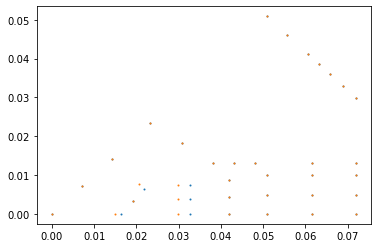

In [3]:
control_points, weights, surface = create_geometry()
print(surface(np.array([0.0,0.0,0.0,0.0])))

var1 = 0.00075
var2 = 0.00075
var3 = 0.00075
var4 = 0.00075
pts = control_points([0,0,0,0])
plt.figure()
plt.scatter(pts[0,...].flatten(),pts[1,...].flatten(),s=1)
pts = control_points([0,-0.003,0,0])
plt.scatter(pts[0,...].flatten(),pts[1,...].flatten(),s=1)


basis1 = tt_iga.bspline.BSplineBasis(np.array([0,0.4,0.4,0.6,0.6,1]),2)
basis2 = tt_iga.bspline.BSplineBasis(np.array([0,0.15,0.3,0.5,1]),1)
basis = [basis1, basis2]
basis_solution = [tt_iga.bspline.BSplineBasis(np.concatenate((np.linspace(0,0.4,21), np.linspace(0.4,0.6,21),np.linspace(0.6,1,21))),2)]
basis_solution.append(tt_iga.bspline.BSplineBasis(np.concatenate((np.linspace(0,0.15,16),np.linspace(0.15,0.3,15), np.linspace(0.3,0.5,15),np.linspace(0.5,1,17))),2))

nl = 8
basis_param = [tt_iga.lagrange.LagrangeLeg(nl,[-var1,var1]), tt_iga.lagrange.LagrangeLeg(nl,[-var2,var2]), tt_iga.lagrange.LagrangeLeg(nl,[-var3,var3]), tt_iga.lagrange.LagrangeLeg(nl,[-var4,var4])]
geom = tt_iga.PatchNURBS.interpolate_parameter_dependent(control_points, weights, basis, basis_param)

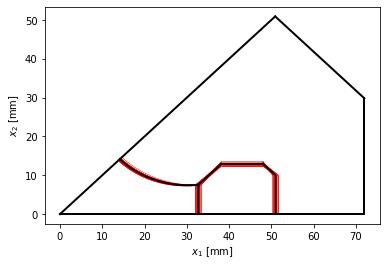

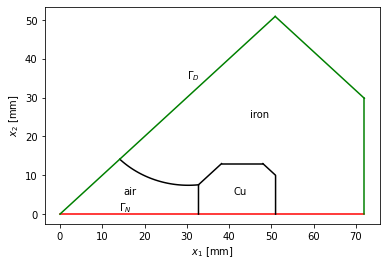

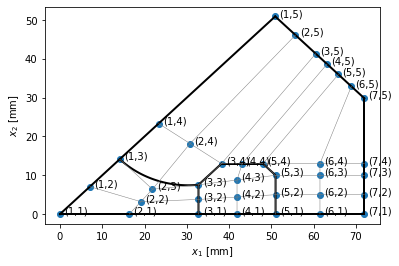

In [4]:
plt.figure()

for i in range(20):
    paramz = [tn.tensor([np.random.uniform()*2*var1-var1]),tn.tensor([np.random.uniform()*2*var2-var2]),tn.tensor([np.random.uniform()*2*var3-var3]),tn.tensor([np.random.uniform()*2*var4-var4])]
    line = geom([tn.linspace(0,0.4,32),tn.tensor([0.3])]+paramz)
    plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    line = geom([tn.linspace(0.4,0.6,32),tn.tensor([0.5])]+paramz)
    plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    # line = geom([tn.linspace(0,1,32),tn.tensor([1])]+paramz)
    # plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    # line = geom([tn.linspace(0,1,32),tn.tensor([0.0])]+paramz)
    # plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)

    # line = geom([tn.tensor([0.0]),tn.linspace(0,1,32)]+paramz)
    # plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    # line = geom([tn.tensor([1.0]),tn.linspace(0,1,32)]+paramz)
    # plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,32)]+paramz)
    plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)
    line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,32)]+paramz)
    plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r', linewidth = 0.5)

paramz = [tn.tensor([0]),tn.tensor([0]),tn.tensor([0]),tn.tensor([0])]
line = geom([tn.linspace(0,0.4,100),tn.tensor([0.3])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0.4,0.6,100),tn.tensor([0.5])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0,1,100),tn.tensor([1])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0,1,100),tn.tensor([0.0])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)

line = geom([tn.tensor([0.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([1.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)

plt.xlabel(r'$x_1$ [mm]')
plt.ylabel(r'$x_2$ [mm]')
import tikzplotlib
# plt.savefig('quad_section.eps')
tikzplotlib.save('quad_params.tex')

plt.figure()
paramz = [tn.tensor([0]),tn.tensor([0]),tn.tensor([0]),tn.tensor([0])]
line = geom([tn.linspace(0,0.4,100),tn.tensor([0.3])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k')
line = geom([tn.linspace(0.4,0.6,100),tn.tensor([0.5])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k')
line = geom([tn.linspace(0,1,100),tn.tensor([1])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'g')
line = geom([tn.linspace(0,1,100),tn.tensor([0.0])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'r')

line = geom([tn.tensor([0.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'g')
line = geom([tn.tensor([1.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'g')
line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k')
line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k')
plt.xlabel(r'$x_1$ [mm]')
plt.ylabel(r'$x_2$ [mm]')
plt.text(0.03*1e3,0.035*1e3,r'$\Gamma_D$')
plt.text(0.014*1e3,0.0008*1e3,r'$\Gamma_N$')
plt.text(0.045*1e3,0.025*1e3,r'iron')
plt.text(0.041*1e3,0.005*1e3,r'Cu')
plt.text(0.015*1e3,0.005*1e3,r'air')
import tikzplotlib
# plt.savefig('quad_section.eps')
tikzplotlib.save('quad_section.tex')

plt.figure()
paramz = [tn.tensor([0]),tn.tensor([0]),tn.tensor([0]),tn.tensor([0])]
line = geom([tn.linspace(0,0.4,32),tn.tensor([0.3])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0.4,0.6,32),tn.tensor([0.5])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0,1,32),tn.tensor([1])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.linspace(0,1,32),tn.tensor([0.0])]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)

line = geom([tn.tensor([0.0]),tn.linspace(0,1,32)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([1.0]),tn.linspace(0,1,32)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,32)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)
line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,32)]+paramz)
plt.plot(line[0].numpy().squeeze()*1e3, line[1].numpy().squeeze()*1e3, 'k', linewidth = 2)

pts = control_points([0,0,0,0])

plt.scatter(pts[0,...]*1e3, pts[1,...]*1e3)

plt.plot(pts[0,:,1]*1e3, pts[1,:,1]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,:,2]*1e3, pts[1,:,2]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,:,3]*1e3, pts[1,:,3]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,1,:]*1e3, pts[1,1,:]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,2,:]*1e3, pts[1,2,:]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,3,:]*1e3, pts[1,3,:]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,4,:]*1e3, pts[1,4,:]*1e3,'gray',linewidth=0.5)
plt.plot(pts[0,5,:]*1e3, pts[1,5,:]*1e3,'gray',linewidth=0.5)

for i in range(5): 
    for j in range(7): 
        plt.text(pts[0,j,i]*1e3+1,pts[1,j,i]*1e3,'(%d,%d)'%(j+1,i+1), fontsize = 10)

plt.xlabel(r'$x_1$ [mm]')
plt.ylabel(r'$x_2$ [mm]')
tikzplotlib.save('quad_points.tex')

In [5]:

mu0 = 4*np.pi*1e-7
mur = 1500
mu_ref = lambda y: 1/mu0*((y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+(y[...,1]<0.3)*(y[...,0]<0.4))+1/(mu0*mur)*tn.logical_not((y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+(y[...,1]<0.3)*(y[...,0]<0.4))

tme = datetime.datetime.now()
Mass_tt = geom.mass_interp(basis_solution, eps = 1e-10)
tme = datetime.datetime.now() - tme
print('Time mass ', tme)
tme = datetime.datetime.now()
Stiff_tt = geom.stiffness_interp(basis_solution, eps = 1e-9, func_reference=mu_ref, qtt = True, verb = True)
tme = datetime.datetime.now() - tme
print('Time stiffness ', tme)

Jref = lambda y: 24*45/surface(y[...,2:])*(y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+0.0
# Jref = lambda y: 5000000*(y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+0.0

rhs_tt = geom.rhs_interp(basis_solution,Jref)

P1 = tn.eye(Mass_tt.N[0])
P2 = tn.eye(Mass_tt.N[0])
P2[-1,-1] = 0
P1[0,0] = 0
P1[-1,-1] = 0
Pin_tt = tntt.rank1TT([P1,P2]) ** tntt.eye([nl]*4)
Pbd_tt = (tntt.eye(Mass_tt.N) - Pin_tt) ** tntt.eye([nl]*4) / Mass_tt.N[0]

M_tt = (Pin_tt@Stiff_tt+Pbd_tt).round(1e-11)
rhs_tt = (Pin_tt @ rhs_tt + 0).round(1e-11)

print('System matrix... ',flush=True)

print('Rank Stiff', Stiff_tt.R, ' storage [MB] ',tntt.numel(Stiff_tt)*8/1e6)
print('Rank Mass', Mass_tt.R, ' storage [MB] ',tntt.numel(Mass_tt)*8/1e6)
print('Rank Mtt ',M_tt.R, ' storage [MB] ',tntt.numel(M_tt)*8/1e6)
print('Rank rhstt ',rhs_tt.R, ' storage [MB] ',tntt.numel(rhs_tt)*8/1e6)





Time mass  0:00:01.990302
time omega 0:00:01.764590
rank omega, [1, 17, 20, 11, 4, 2, 1]
QTT enabled:
[240, 236, 8, 8, 8, 8]
  || 
  \/  
[2, 2, 2, 2, 3, 5, 2, 2, 59, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
rank of Ftt is  [1, 3, 1, 1, 1, 1, 1]


In [ ]:
tme = datetime.datetime.now() 
# dofs_tt = tntt.solvers.amen_solve(M_tt.cuda(), rhs_tt.cuda(), x0 = tntt.ones(rhs_tt.N).cuda(), eps = eps_solver, nswp = 50, kickrank = 4, preconditioner = 'c', verbose = False).cpu()
# dofs_tt = tntt.reshape(tntt.solvers.amen_solve(tntt.reshape(M_tt,[(2,2)]*21).round(1e-12).cuda(), tntt.reshape(rhs_tt,[2]*21).round(1e-12).cuda(), x0 = tntt.reshape(tntt.ones(rhs_tt.N),[2]*21).cuda(), eps = 1e-6, nswp = 50, kickrank = 32, preconditioner = 'c', verbose = True),rhs_tt.N).round(1e-12)
# dofs_tt = tntt.solvers.amen_solve(M_tt, rhs_tt, x0 = tntt.ones(rhs_tt.N), eps = 1e-6, nswp = 50, kickrank = 8, preconditioner = 'c', verbose = True).cpu()
dofs_tt = tntt.solvers.amen_solve(M_tt.cuda(), rhs_tt.cuda(), x0 = tntt.ones(rhs_tt.N).cuda(), rmax = 300, eps = 1e-6, nswp = 50, kickrank = 8, preconditioner = 'c', verbose = True).cpu()
tme = datetime.datetime.now() - tme
print('Time system solve ',tme,flush=True)

In [ ]:
fspace = tt_iga.Function(basis_solution+basis_param)
fspace.dofs = dofs_tt

plt.figure()
y1, y2 = basis_solution[0].collocation_points(3)[0], basis_solution[1].collocation_points(3)[0]
w1, w2 = basis_solution[0].collocation_points(3)[1], basis_solution[1].collocation_points(3)[1]
ws = np.einsum('i,j->ij',w1,w2)
X1,X2 = geom([y1,y2]+[tn.tensor([0.0])]*4)
u = fspace([tn.tensor(y1),tn.tensor(y2)]+[tn.tensor([0.0])]*4)
plt.contourf(X1.numpy().squeeze(), X2.numpy().squeeze(),u.numpy().squeeze(),levels=32)
plt.colorbar()



    
u = fspace([tn.tensor([0.05]),tn.tensor([0.0]), tn.linspace(-0.001,0.001,10),tn.linspace(-0.001,0.001,10),tn.linspace(-0.001,0.001,10), tn.linspace(-0.001,0.001,10)])

def get_in_reference(x, param1):
    return 0.4*x/(3.27640e-2+param1)
    # return 0.1*x/(geom([tn.tensor([0.1]),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([param1]), tn.tensor([0.0])])[0].numpy().squeeze())




In [ ]:
y1, y2 = np.linspace(0,1,32), np.linspace(0.,1,32)

grad1, grad2 = geom.gradient_physical(basis_solution, fspace)

g2 = -grad1([tn.tensor(y1),tn.tensor(y2),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])])
g1 = grad2([tn.tensor(y1),tn.tensor(y2),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])])
x1,x2 = geom([tn.tensor(y1),tn.tensor(y2)]+[tn.tensor([0.0])]*4)

plt.figure()
plt.quiver(x1.numpy().flatten(),x2.numpy().flatten(),g1.numpy().flatten(),g2.numpy().flatten(),np.sqrt(g1.numpy().flatten()**2+g2.numpy().flatten()**2))
plt.colorbar()


In [ ]:
import pickle

results = []

Nr = 32

for i in range(Nr):
    y1 = basis_solution[0].collocation_points(1)[0]
    y2 = basis_solution[1].collocation_points(1)[0]
    w = np.outer(basis_solution[0].collocation_points(1)[1], basis_solution[1].collocation_points(1)[1])*geom.eval_omega([tn.tensor(y1),tn.tensor(y2)] + [ tn.tensor([p]) for p in params]).numpy().squeeze()
    params = np.random.uniform([-var1,-var2,-var3,-var4],[var1,var2,var3,var4])
    if i==0: params = params*0
    x1, x2 = geom([tn.tensor(y1),tn.tensor(y2)] + [ tn.tensor([p]) for p in params])

    x1 = x1.numpy().squeeze()
    x2 = x2.numpy().squeeze()

    A = fspace([tn.tensor(y1),tn.tensor(y2)] + [ tn.tensor([p]) for p in params]).numpy().squeeze()
    B2 = -grad1([tn.tensor(y1),tn.tensor(y2)] + [ tn.tensor([p]) for p in params]).numpy().squeeze()
    B1 =  grad2([tn.tensor(y1),tn.tensor(y2)] + [ tn.tensor([p]) for p in params]).numpy().squeeze()

    results.append({'thetas' : params.copy(), 'x1' : x1.copy(), 'x2' : x2.copy(), 'B1' : B1.copy(), 'B2' : B2.copy(), 'A' : A.copy(), 'w' : w.copy(), 'J0' : 24*45/surface(params)})

with open('quad_parameters.pkl','wb') as f:
    pickle.dump(results, f)

In [ ]:
print(geom([tn.tensor([0.4]),tn.tensor([0.0]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[0].numpy().squeeze())
print(geom([tn.tensor([0.4]),tn.tensor([0.0]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[1].numpy().squeeze())
print(geom([tn.tensor([0.4]),tn.tensor([0.3]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[0].numpy().squeeze())
print(geom([tn.tensor([0.4]),tn.tensor([0.3]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[1].numpy().squeeze())
print(geom([tn.tensor([0.4]),tn.tensor([0.5]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[0].numpy().squeeze())
print(geom([tn.tensor([0.4]),tn.tensor([0.5]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[1].numpy().squeeze())
print(geom([tn.tensor([0.6]),tn.tensor([0.5]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[0].numpy().squeeze())
print(geom([tn.tensor([0.6]),tn.tensor([0.5]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[1].numpy().squeeze())
print(geom([tn.tensor([0.6]),tn.tensor([0.3]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[0].numpy().squeeze())
print(geom([tn.tensor([0.6]),tn.tensor([0.3]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[1].numpy().squeeze())
print(geom([tn.tensor([0.6]),tn.tensor([0.0]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[0].numpy().squeeze())
print(geom([tn.tensor([0.6]),tn.tensor([0.0]), tn.tensor([results[1]['thetas'][0]]), tn.tensor([results[1]['thetas'][1]]),tn.tensor([results[1]['thetas'][2]]),tn.tensor([results[1]['thetas'][3]])])[1].numpy().squeeze())